<a href="https://colab.research.google.com/github/kiana59/MyFirstRepository/blob/master/UCI_HeartDisease_usingNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements
In this section, I am importing all the packages that I will be using to create a model to predict the heart disease from the cleaned UCI heart disease dataset.


In [1]:

import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


Using TensorFlow backend.


Uploaded the heart.csv file in the google colab and checking the if the files resides in the current directory or not using listdir() function.

In [4]:
print(os.listdir())
np.random.seed(1)

['.config', 'heart.csv', 'sample_data']


# Read CSV data
Reading csv data file into pandas data frame and displaying the first 5 rows from the dataframe using head() function.

In [5]:
data = pd.read_csv("heart.csv")
print(data.head(5))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


Checking the datatypes of the data to check for any categorical value and see if we need to encode it to numeric value.

In [6]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Creating and input (X) and output (Y) variable and assigining the data from the dataframe to these variables. All column except the target column is assigned to the X input variable and the values from the target column is assigned to the Y output variable

In [7]:
X = data.drop(['target'], axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
Y=data.target.values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Creating Train, Validation and Test dataset
Using the train_test_split method from the sklearn package to split the dataset into train, validation and test set. First the dataset is splitted into training set(90%) and validation set (10%). Then a test set is created by again splitting the new training set data. 

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
X_train,X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.1, random_state=1)

Printing the size of all the splitted datasets.

In [10]:
print("Train Features Size:", X_train.shape)
print("Validation Features Size:", X_val.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Validations Labels Size:", Y_val.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (244, 13)
Validation Features Size: (28, 13)
Test Features Size: (31, 13)
Train Labels Size: (244,)
Validations Labels Size: (28,)
Test Labels Size: (31,)


# Defining a neural network model
Created a neural network model with 13 input variables in the input layer, 4 hidden layers and 1 output layers with 2 target or output variables that classify disease vs. non-disease.
The first hidden input layer consists of 64 instance, second layer consist of 16 instance, third layer consist of 8 and fourth consist of 4 instances. I have used reLu as an activation funtion in the hidden layers and softmax in the final output layer.
To compute the loss sparse_categorical_crossentropy was used and to optimize the training parametes widely used adam optimier was used. Accuracy was used as a metrics to evaluate the neural network model.

In [0]:
def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(64, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

Displaying the defined neural network.

In [12]:
learning_rate = 0.00001
model = NN_model(learning_rate)
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
Total params: 2,118
Trainable params: 2,118
Non-trainab

# Training the neural network model

In [13]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=16, verbose=2)

Train on 244 samples, validate on 28 samples
Epoch 1/100
244/244 - 0s - loss: 0.6875 - acc: 0.5574 - val_loss: 0.6946 - val_acc: 0.5000
Epoch 2/100
244/244 - 0s - loss: 0.6797 - acc: 0.5574 - val_loss: 0.6973 - val_acc: 0.5000
Epoch 3/100
244/244 - 0s - loss: 0.6723 - acc: 0.5533 - val_loss: 0.6989 - val_acc: 0.5000
Epoch 4/100
244/244 - 0s - loss: 0.6602 - acc: 0.5615 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 5/100
244/244 - 0s - loss: 0.6499 - acc: 0.6516 - val_loss: 0.7248 - val_acc: 0.5714
Epoch 6/100
244/244 - 0s - loss: 0.6390 - acc: 0.6393 - val_loss: 0.7217 - val_acc: 0.5000
Epoch 7/100
244/244 - 0s - loss: 0.6258 - acc: 0.6598 - val_loss: 0.7489 - val_acc: 0.5714
Epoch 8/100
244/244 - 0s - loss: 0.6325 - acc: 0.6475 - val_loss: 0.7121 - val_acc: 0.5000
Epoch 9/100
244/244 - 0s - loss: 0.5979 - acc: 0.7172 - val_loss: 0.7541 - val_acc: 0.5357
Epoch 10/100
244/244 - 0s - loss: 0.5935 - acc: 0.7172 - val_loss: 0.7207 - val_acc: 0.5357
Epoch 11/100
244/244 - 0s - loss: 0.5774 - a

## Model accuracy Plot

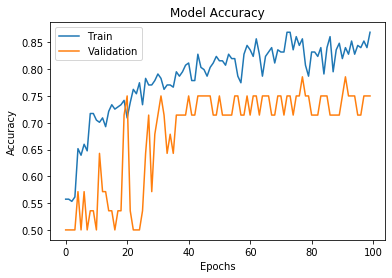

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

## Model Loss plot

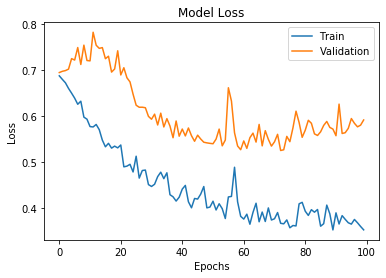

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

# Prediction Test and Classification Report
Finally, predicting the class from the input test dataset and generating the classification report using the imported package sklearn.metrics.

The trained model using neural network has a model accuracy of around 90% and has the similar f1 score, where f1 is a measure of test accuracy in binary classification which considers both precision and recall.

In [16]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model Accracy: 90.32258064516128 %
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.83      1.00      0.91        15

    accuracy                           0.90        31
   macro avg       0.92      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31

